In [1]:
import gensim
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from gensim.models import KeyedVectors
word2vec = KeyedVectors.load_word2vec_format('data/word2vec-google-news-300/word2vec-google-news-300.gz', limit=600000, binary=True)

# Get Hispanic and American Words and Normalize

In [3]:
hispanic_vector = word2vec.get_vector('Hispanic')
white_vector = word2vec.get_vector('American')

hispanic_vector = hispanic_vector/np.linalg.norm(hispanic_vector)
white_vector = white_vector/np.linalg.norm(white_vector)

# Get Direction

In [4]:
direction = white_vector - hispanic_vector

In [5]:
direction_norm = np.sqrt(np.sum(direction**2))

# Get Distances

In [10]:
words_to_check = ['Hispanic','American','businessman','manager','employed'
                  ,'unemployed','legislator','butler','crooner','waiter','waitress','janitor'
                  ,'governor','doctor','nurse','attorney','lawyer','dentist','astronaut'
                  ,'plumber','barber','cashier','dishwasher','childcare','nanny','manicurist'
                  ,'bartender','carpenter']
adjectives = ['high-quality','low-quality','best','worst'
                  ,'five-star','one-star','tasty','nasty','clean','dirty','job','jobless']

positions = list()
for word in words_to_check:
    word_vector = word2vec.get_vector(word)
    word_vector = word_vector/np.linalg.norm(word_vector)
    position = np.dot(word_vector, direction)/direction_norm**2
    positions.append(position)
    
[(i, x) for i, x in zip(words_to_check, positions)]

[('Hispanic', -0.5000000635925902),
 ('American', 0.5000000145469483),
 ('businessman', 0.014966342006337518),
 ('manager', -0.044046897840120204),
 ('employed', 0.0005510201236649229),
 ('unemployed', -0.09912955557016717),
 ('legislator', -0.04502839309565208),
 ('butler', 0.03777119222427905),
 ('crooner', 0.0009441761200545905),
 ('waiter', -0.017066888683566254),
 ('waitress', -0.03349308495058617),
 ('janitor', -0.05771596729073341),
 ('governor', -0.06402036767245431),
 ('doctor', 0.043009416984329),
 ('nurse', -0.03986889885230496),
 ('attorney', -0.08320580278383641),
 ('lawyer', -0.0033959922827912843),
 ('dentist', -0.07016067359769895),
 ('astronaut', -0.002376163260064759),
 ('plumber', -0.0058440809767415485),
 ('barber', -0.04796734896612049),
 ('cashier', -0.07716144852631611),
 ('dishwasher', -0.02779293300810745),
 ('childcare', -0.13453235520327422),
 ('nanny', -0.04142837554047466),
 ('manicurist', -0.06410031206879484),
 ('bartender', -0.04590868266906822),
 ('carp

In [11]:
with open("test.txt", "rb") as fp:   # Unpickling
    other_pos = pickle.load(fp)

(-0.3, 0.4)

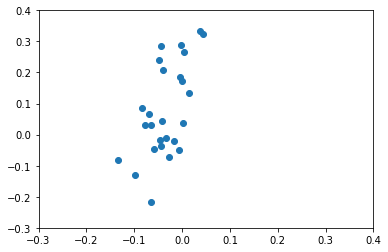

In [19]:
plt.scatter(positions[2:], other_pos[2:])
plt.xlim(-0.3,0.4)
plt.ylim(-0.3,0.4)